In [164]:
import pandas as pd
import numpy as np
import cv2

In [165]:
data = pd.read_csv('./data.csv', encoding='utf8')
DIMENSION = 1200

In [166]:
IMG_SIZE = (DIMENSION, DIMENSION)

def getImages(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMG_SIZE)
  return np.array(image, dtype='float32')

data['image'] = data['path'].apply(getImages)
data['image'].head()

KeyboardInterrupt: 

# Mostrando imagenes

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

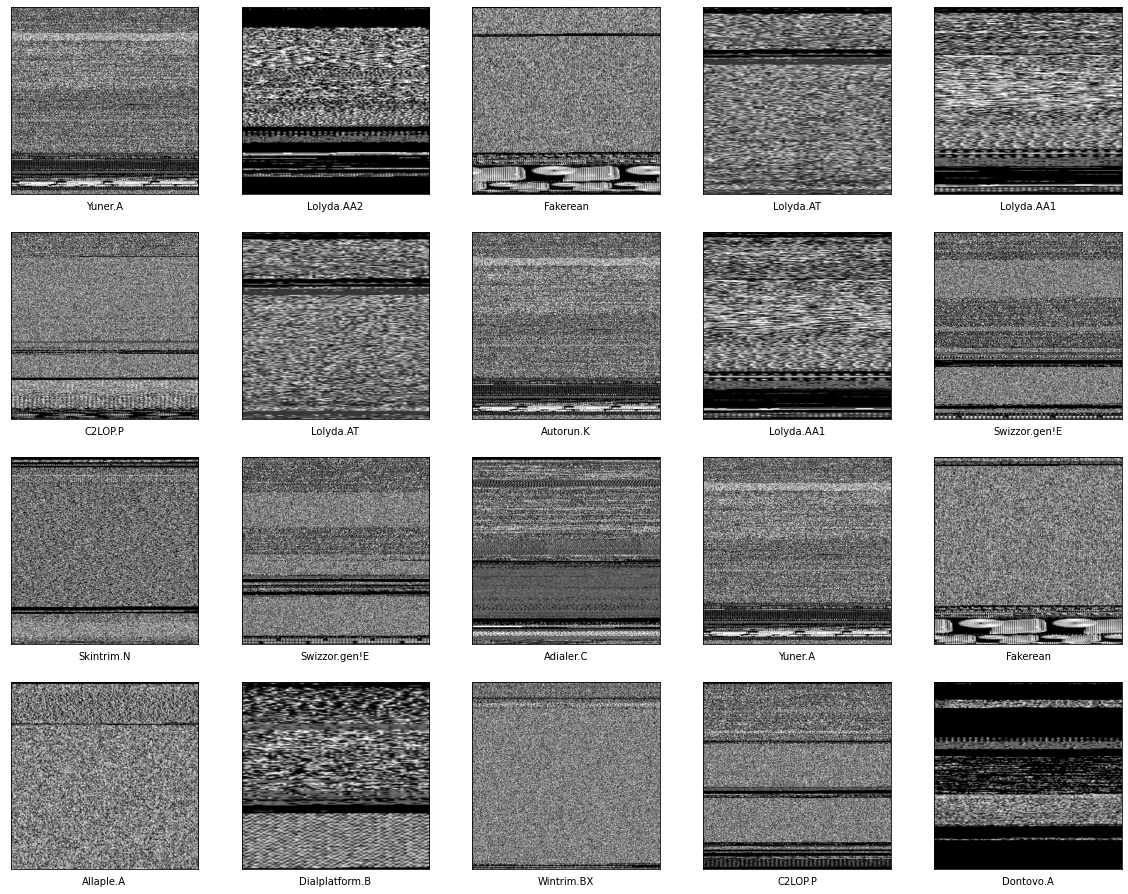

In [ ]:
to_show = data.sample(20)

fig_size = (20, 20)
fig = plt.figure(figsize=fig_size)

id = 0
for index, row in to_show.iterrows():
  plt.subplot(5, 5, id + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['familyName'])
  id += 1

plt.show()

# Manipulacion de la data

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
X = []
y = np.zeros((len(data),25))
for index, row in data.iterrows():
  X.append(row['image'])
  y[index][row['familyId']] = 1
X = np.array(X)
print(len(X), len(y))

4909 4909


In [ ]:
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (3436, 300, 300, 3) (3436, 25)
Test: (1473, 300, 300, 3) (1473, 25)


# Desarrollo del modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), strides=(1, 1), input_shape=(DIMENSION, DIMENSION, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 341056)            0         
                                                                 
 dense_16 (Dense)            (None, 512)              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
H = model.fit(X_train, y_train, batch_size=128, epochs=4, verbose=2)

Epoch 1/4
27/27 - 175s - loss: 1520.0819 - accuracy: 0.5585 - 175s/epoch - 6s/step
Epoch 2/4
27/27 - 116s - loss: 1.0078 - accuracy: 0.9223 - 116s/epoch - 4s/step
Epoch 3/4
27/27 - 110s - loss: 0.1634 - accuracy: 0.9843 - 110s/epoch - 4s/step
Epoch 4/4
27/27 - 109s - loss: 0.0222 - accuracy: 0.9974 - 109s/epoch - 4s/step


In [ ]:
history_dict = H.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

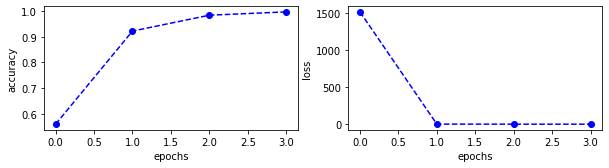

In [ ]:
fig = plt.figure(figsize=(10,5))

# Plot accuracy
plt.subplot(221)
plt.plot(H.history['accuracy'], 'bo--', label='acc')
plt.ylabel('accuracy')
plt.xlabel('epochs') 

# Plot loss function
plt.subplot(222)
plt.plot(H.history['loss'], 'bo--', label='loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
y_preds = model.predict(X_test, verbose=0)

In [ ]:
def getCategory(data):
  y_prediction = []
  for item in data:
    max_value = max(item)
    max_index = list(item).index(max_value)
    y_prediction.append(max_index)
  return np.array(y_prediction).astype('int64')

y_prediction = getCategory(y_preds)
y_validation = getCategory(y_test)

## Metricas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_prediction, y_validation))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       780
           1       0.00      0.00      0.00         0
           2       0.99      0.77      0.87       155
           3       0.90      0.49      0.63       195
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00        31
           6       0.70      0.54      0.61        78
           7       0.36      0.46      0.40        37
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.02      1.00      0.03         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.95      1.00      0.98        41
          17       0.00    

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
confusion_matrix(y_validation, y_prediction)

array([[ 46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 119,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  11,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  31,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   2,   0,  42,   3,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   5,   0,   0,   6,   0,   0,   0],
      

In [ ]:
accuracy_score(y_validation, y_prediction)

0.3557365919891378